# Yeo's cortical networks

NO Cerebellum region is saved in data files.

In [1]:
import pandas as pd

r_names = pd.read_csv('data/ts/ts_1_baseline.csv').columns
# r_names = pd.Series(r.replace(' ', '_') for r in r_names) # can't do unless timeseries files are fixed
r_names = pd.Series(r_names)
r_names = r_names.rename('region').reset_index()
r_names

,index,region
0,0,7Networks_LH_Vis_1
1,1,7Networks_LH_Vis_2
2,2,7Networks_LH_Vis_3
3,3,7Networks_LH_Vis_4
4,4,7Networks_LH_Vis_5
...,...,...
1007,1007,Right Putamen
1008,1008,Right Pallidum
1009,1009,Right Hippocampus
1010,1010,Right Amygdala


In [2]:
r_match = pd.read_csv('data/Schaefer2018_1000Parcels.csv')
r_match['17net'] = r_match.name_17networks.apply(lambda x: (x[11:].split('_')[1]))
r_match['7net'] = r_match.name_7networks.apply(lambda x: (x[11:].split('_')[1]))

In [3]:
r = r_match.merge(r_names, left_on='name_7networks', right_on='region', how='right')
r['7net'] = r.apply(lambda row: row['7net'] if row['region'][0]=='7' else 'Striatum', axis=1)
r['17net'] = r.apply(lambda row: row['17net'] if row['region'][0]=='7' else ('StriatumRight' if row['region'][0]=='R' else 'StriatumLeft'), axis=1)
r

,index_7networks,name_7networks,x,y,z,index_17networks,name_17networks,17net,7net,index,region
0,1.0,7Networks_LH_Vis_1,-35.0,-36.0,-24.0,148.0,17Networks_LH_DorsAttnA_TempOcc_1,DorsAttnA,Vis,0,7Networks_LH_Vis_1
1,2.0,7Networks_LH_Vis_2,-34.0,-51.0,-19.0,5.0,17Networks_LH_VisCent_ExStr_1,VisCent,Vis,1,7Networks_LH_Vis_2
2,3.0,7Networks_LH_Vis_3,-25.0,-45.0,-14.0,151.0,17Networks_LH_DorsAttnA_TempOcc_4,DorsAttnA,Vis,2,7Networks_LH_Vis_3
3,4.0,7Networks_LH_Vis_4,-28.0,-63.0,-13.0,6.0,17Networks_LH_VisCent_ExStr_2,VisCent,Vis,3,7Networks_LH_Vis_4
4,5.0,7Networks_LH_Vis_5,-31.0,-43.0,-9.0,482.0,17Networks_LH_DefaultC_PHC_4,DefaultC,Vis,4,7Networks_LH_Vis_5
...,...,...,...,...,...,...,...,...,...,...,...
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StriatumRight,Striatum,1007,Right Putamen
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StriatumRight,Striatum,1008,Right Pallidum
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StriatumRight,Striatum,1009,Right Hippocampus
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StriatumRight,Striatum,1010,Right Amygdala


In [4]:
import seaborn

# brain regions count

## 7 networks plus Striatum

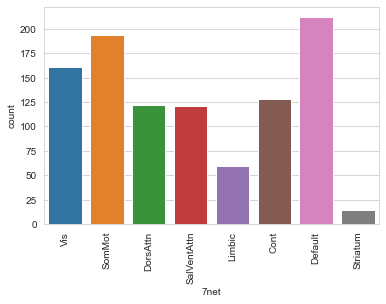

In [5]:
ax = seaborn.countplot(data=r, x='7net')
ax.tick_params(axis='x', rotation=90)

## 17 networks plus Right and Left Striatum

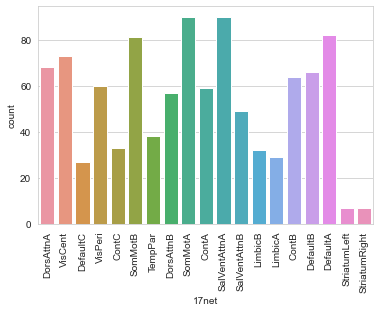

In [6]:
ax = seaborn.countplot(data=r, x='17net')
ax.tick_params(axis='x', rotation=90)

In [7]:
# r.to_csv('data/regions_sorted.csv', index=False)

In [8]:
import nibabel
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
from surfplot import Plot

In [9]:
fname = '/Users/qasem/PycharmProjects/gradients-rl-task/data/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'
l_hemi, r_hemi = load_conte69()
vertices = nibabel.load(fname).get_fdata()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# Plot on brain

## 7 networks

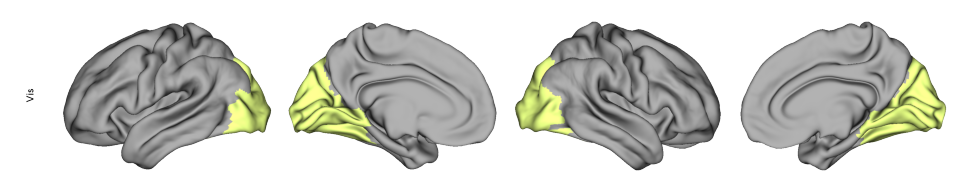

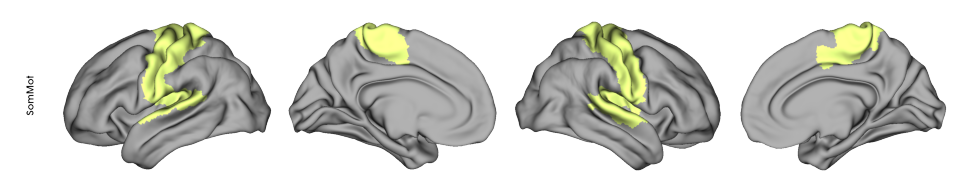

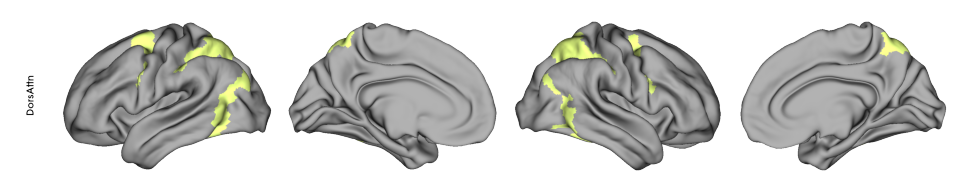

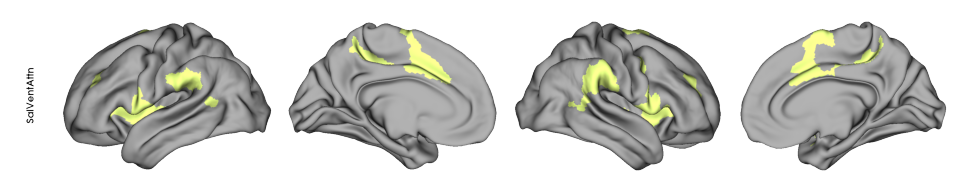

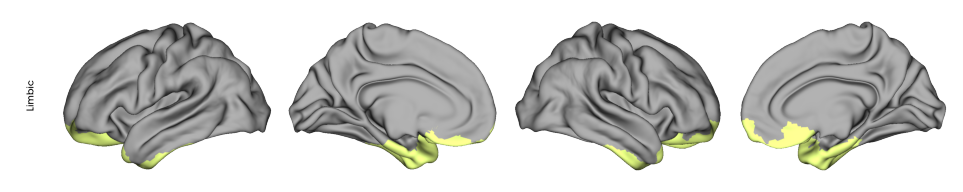

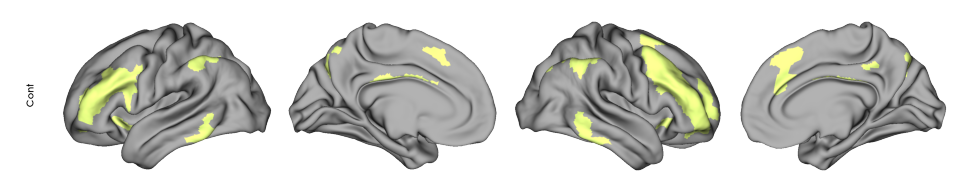

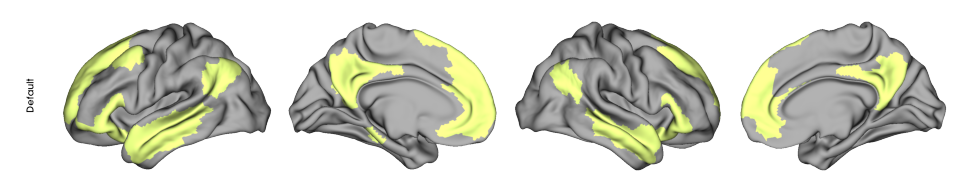

In [13]:
labels = r['7net']
for l in labels.unique()[:-1]:  # put out one subcortical network
    data = labels == l
    data = map_to_labels(data, vertices, mask=(vertices != 0))
    p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300), label_text=[l])
    p.add_layer(data, cbar=False, cmap='Wistia')
    _ = p.build()

## 17 networks

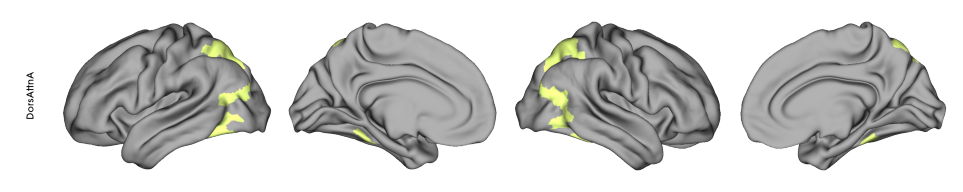

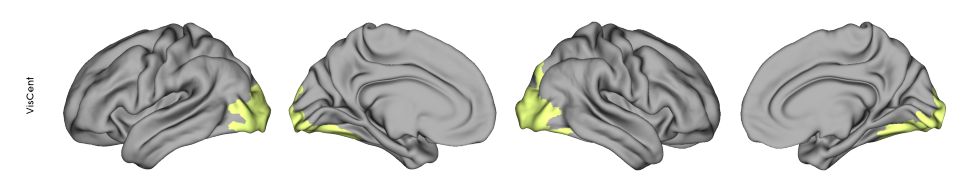

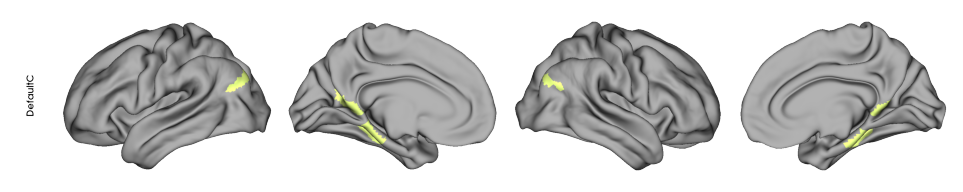

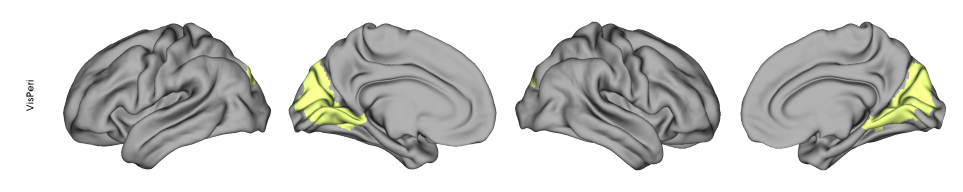

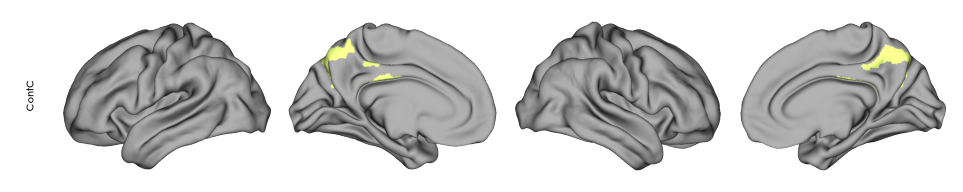

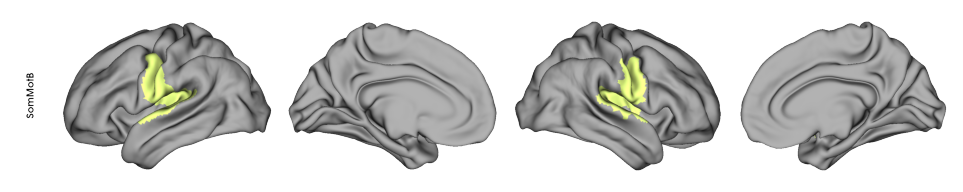

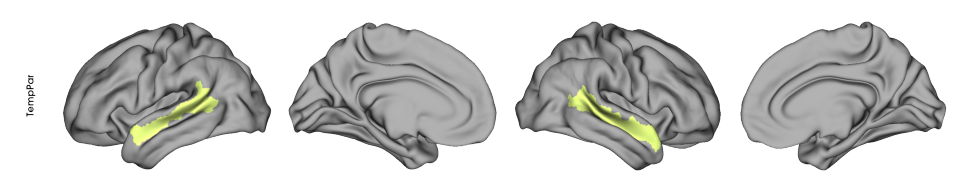

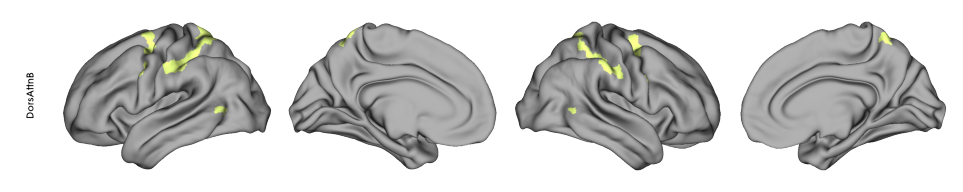

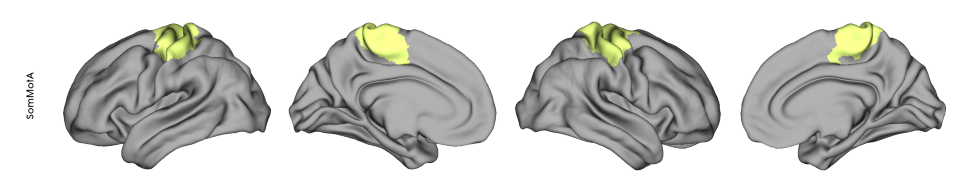

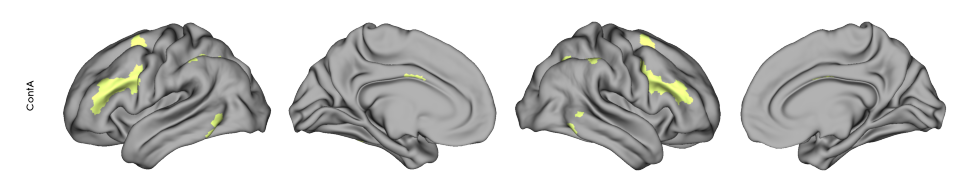

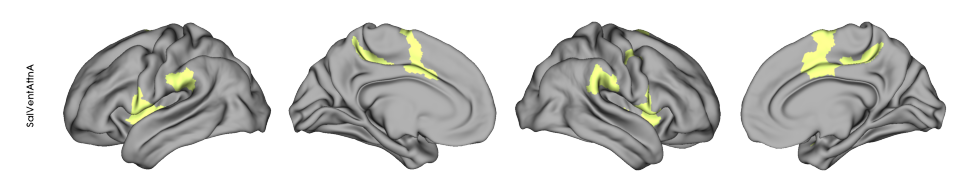

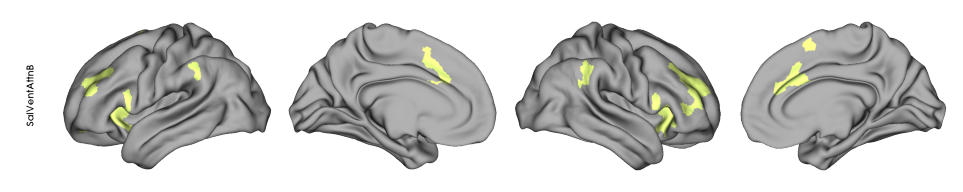

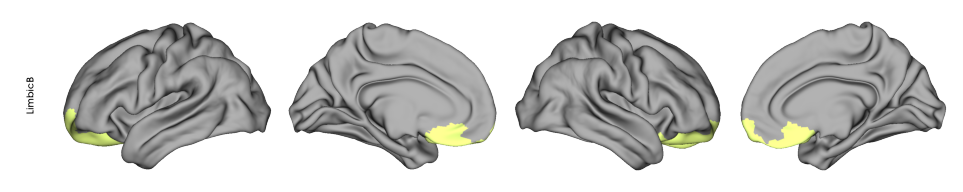

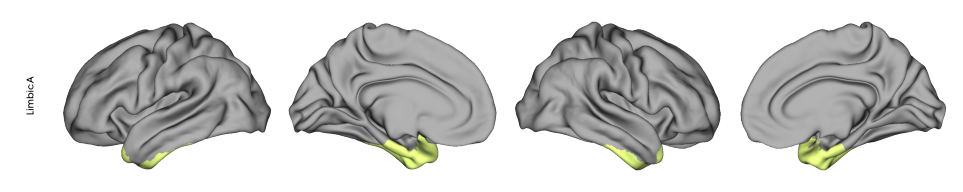

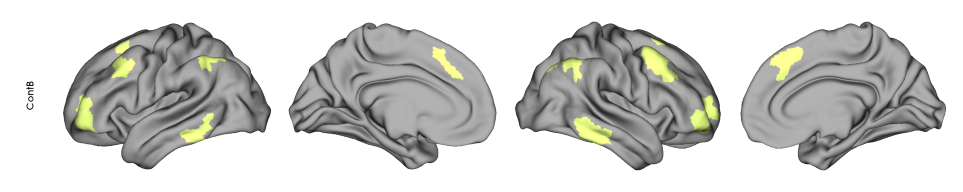

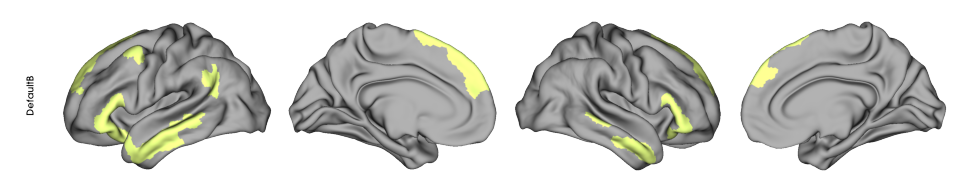

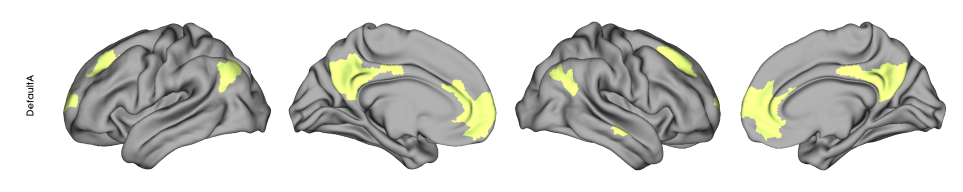

In [14]:
labels = r['17net']
for l in labels.unique()[:-2]:  # put out two subcortical networks
    data = labels == l
    data = map_to_labels(data, vertices, mask=(vertices != 0))
    p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300), label_text=[l])
    p.add_layer(data, cbar=False, cmap='Wistia')
    _ = p.build(    )